# 2022-11-21


## Wine Quality Dataset

In [144]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.linear_model import LinearRegression
from typing import List
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

In [3]:
df = pd.read_csv("./data/winequalityN.csv")

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [1]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
df.hist(ax = ax)

NameError: name 'plt' is not defined

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [14]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [16]:
df["sulphates"].fillna(df.sulphates.mean(), inplace=True)

In [17]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                0
alcohol                  0
quality                  0
dtype: int64

In [18]:
df.shape

(6497, 13)

In [19]:
df.dropna(subset=["fixed acidity", "volatile acidity", "pH"], inplace=True)

In [20]:
df.shape

(6473, 13)

In [21]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
df["citric acid"].fillna(df["citric acid"].mean(), inplace=True)
df["residual sugar"].fillna(df["residual sugar"].mean(), inplace=True)
df["chlorides"].fillna(df["chlorides"].mean(), inplace=True)

In [23]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

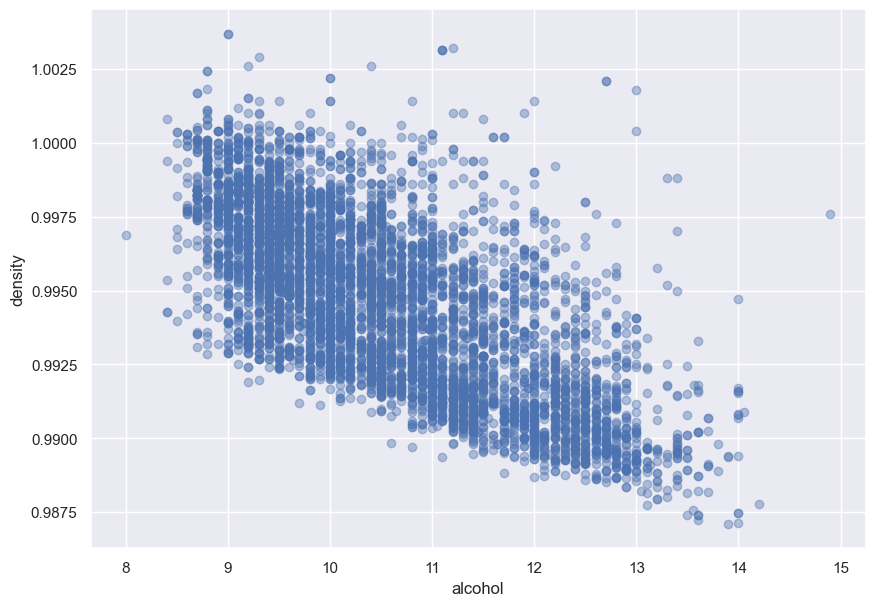

In [167]:
plt.figure(figsize=(10, 7))
plt.scatter(x="alcohol", y="density", data=df, alpha=0.4)
plt.xlabel("alcohol")
plt.ylabel("density")
plt.show()

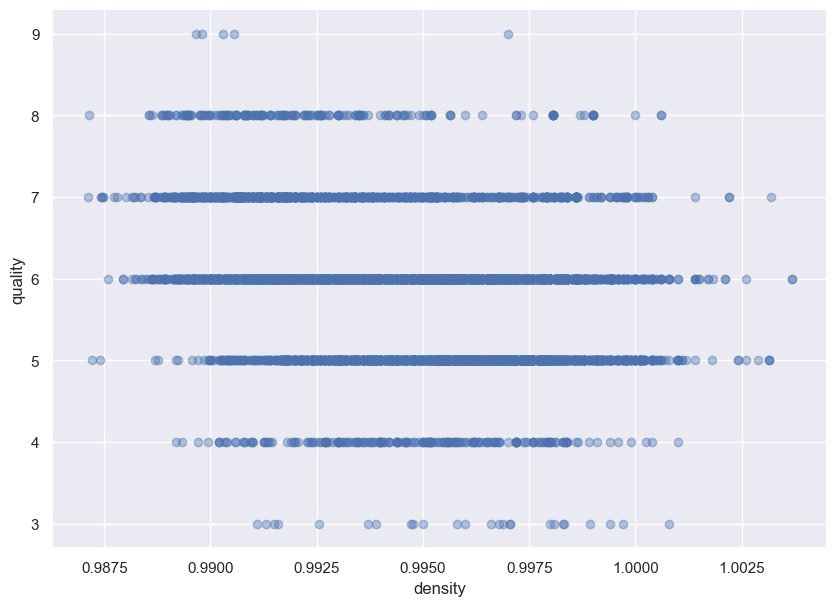

In [168]:
plt.figure(figsize=(10, 7))
plt.scatter(x="density", y="quality", data=df, alpha=0.4)
plt.xlabel("density")
plt.ylabel("quality")
plt.show()

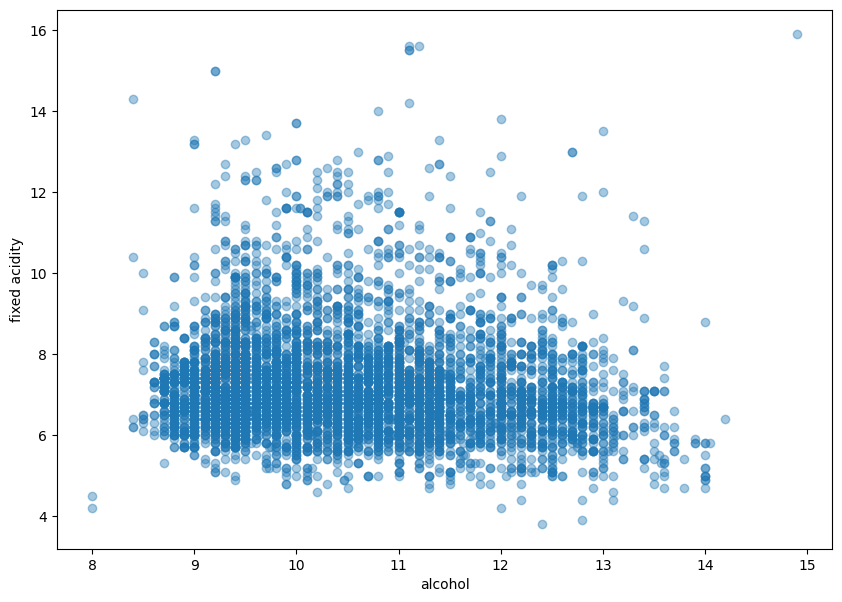

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(x="alcohol", y="fixed acidity", data=df, alpha=0.4)
plt.xlabel("alcohol")
plt.ylabel("fixed acidity")
plt.show()

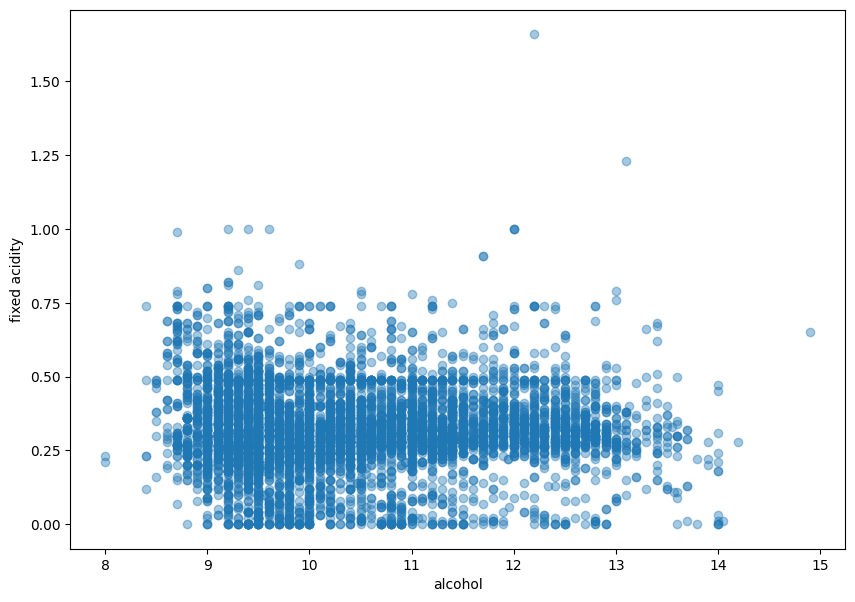

In [28]:
plt.figure(figsize=(10, 7))
plt.scatter(x="alcohol", y="citric acid", data=df, alpha=0.4)
plt.xlabel("alcohol")
plt.ylabel("citric acid")
plt.show()

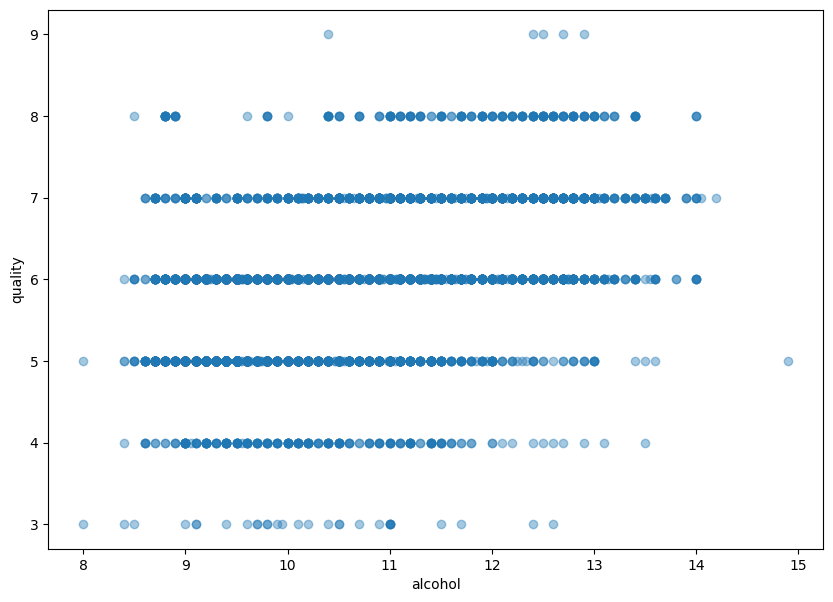

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(x="alcohol", y="quality", data=df, alpha=0.4)
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.show()

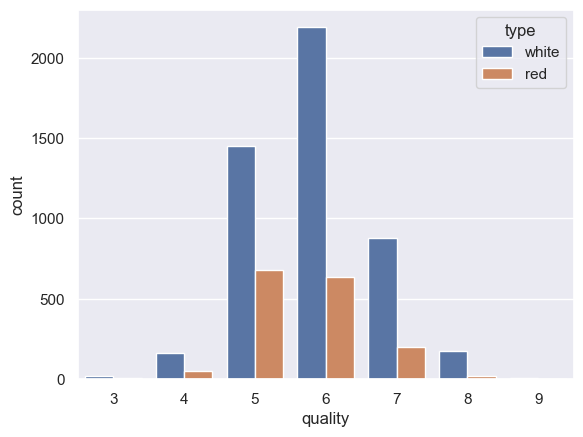

In [40]:
sns.countplot(x="quality",data=df, hue="type")
plt.show()

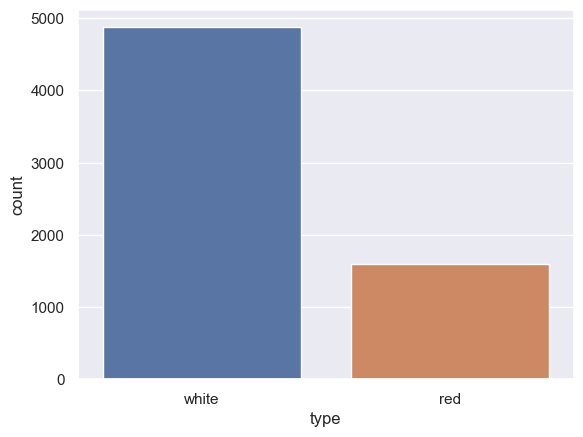

In [41]:
sns.countplot(x="type",data=df)
plt.show()

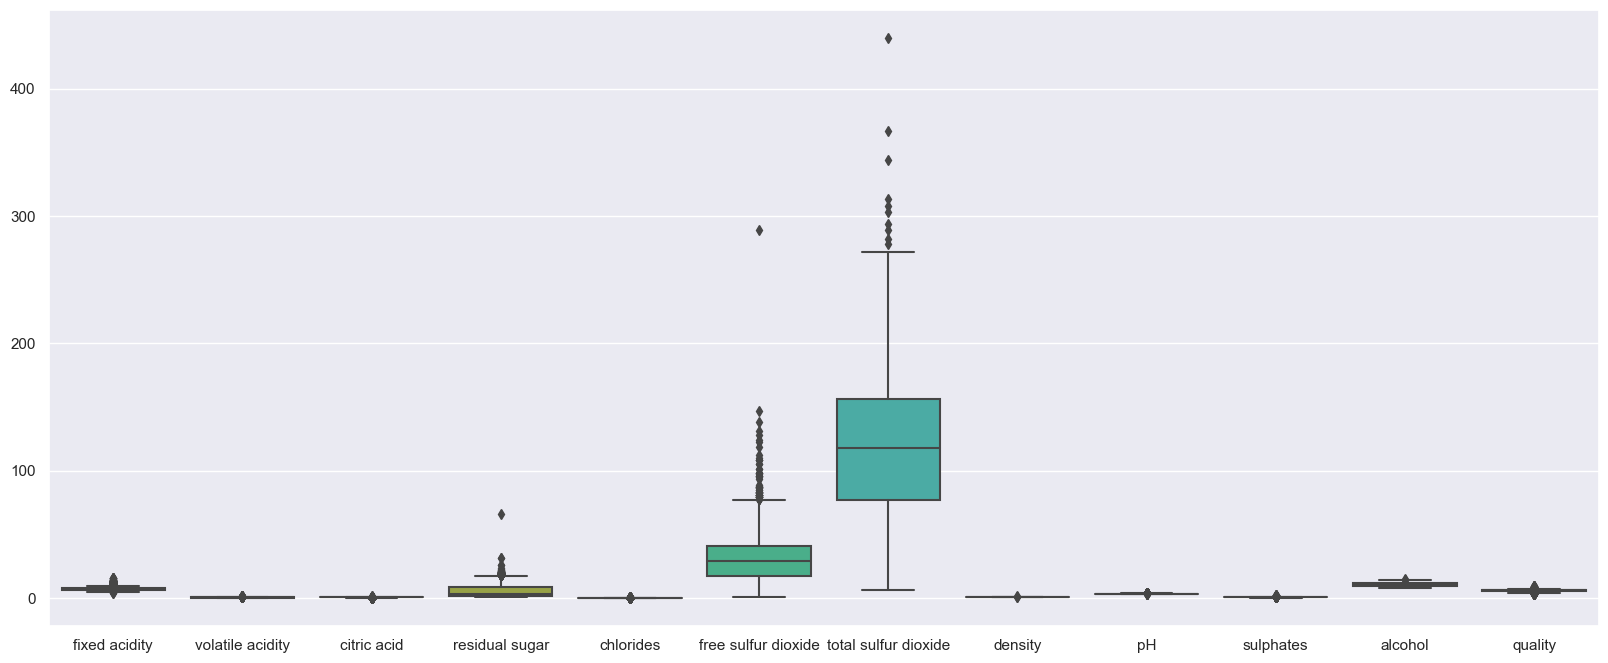

In [46]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)
plt.show()

In [48]:
lower_limit = df["free sulfur dioxide"].mean() - 3 * df["free sulfur dioxide"].std()
upper_limit = df["free sulfur dioxide"].mean() + 3 * df["free sulfur dioxide"].std()
print(lower_limit, upper_limit)

df = df[(df["free sulfur dioxide"] > lower_limit) & (df["free sulfur dioxide"] < upper_limit)]

-22.759452714286393 83.81614976356802


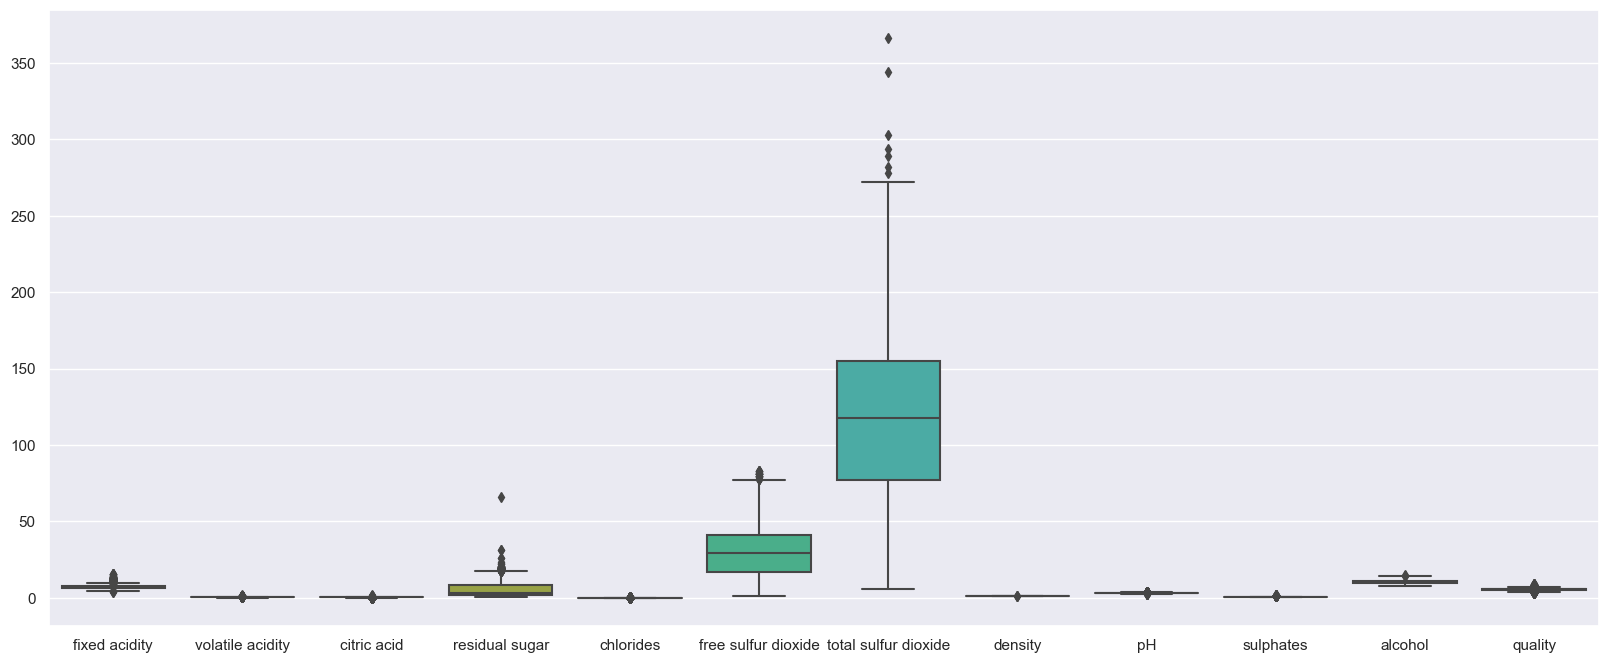

In [49]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)
plt.show()

In [50]:
lower_limit = df["total sulfur dioxide"].mean() - 3 * df["total sulfur dioxide"].std()
upper_limit = df["total sulfur dioxide"].mean() + 3 * df["total sulfur dioxide"].std()
print(lower_limit, upper_limit)

df = df[(df["total sulfur dioxide"] > lower_limit) & (df["total sulfur dioxide"] < upper_limit)]

-53.24128937787839 283.6615161916115


In [51]:
lower_limit = df["residual sugar"].mean() - 3 * df["residual sugar"].std()
upper_limit = df["residual sugar"].mean() + 3 * df["residual sugar"].std()
print(lower_limit, upper_limit)

df = df[(df["residual sugar"] > lower_limit) & (df["residual sugar"] < upper_limit)]

-8.829063264852358 19.706298760031387


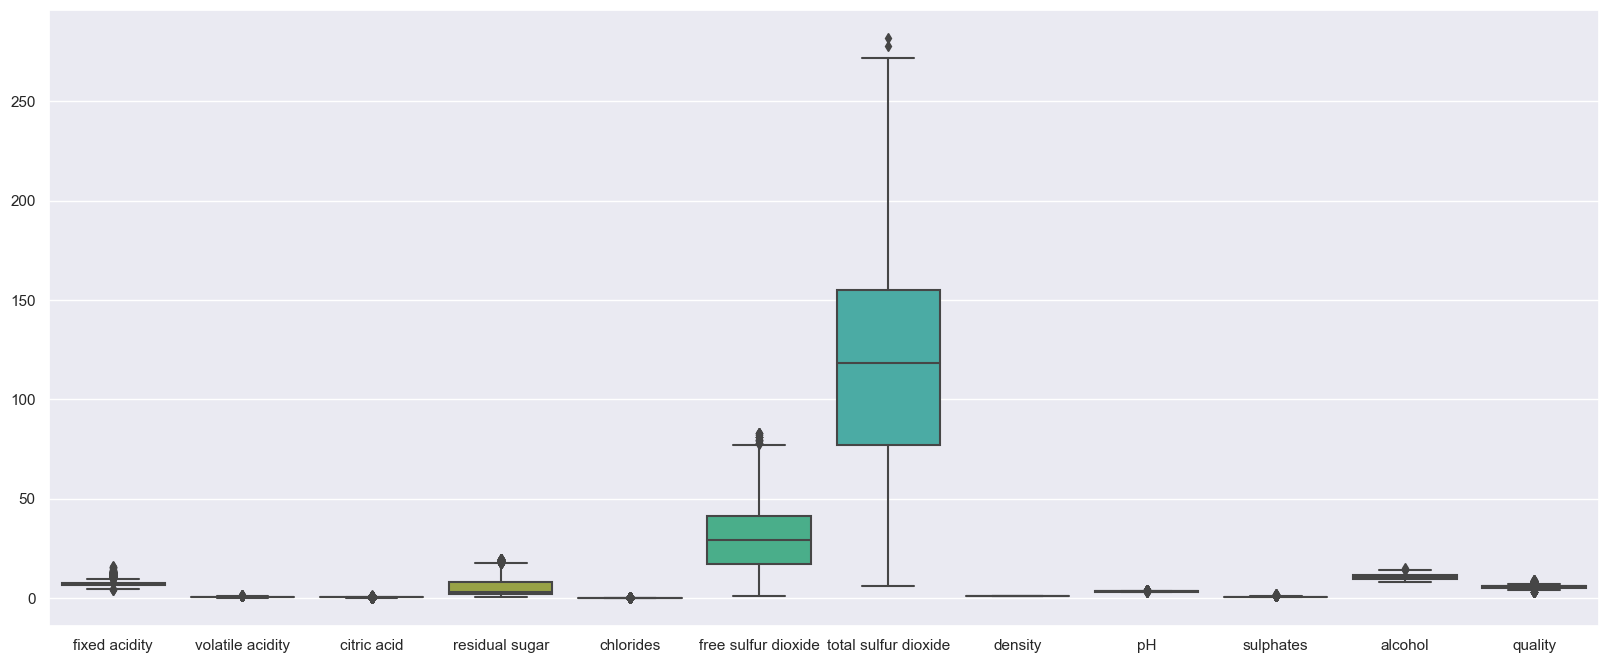

In [52]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)
plt.show()

In [ ]:
brands = ["bmw", "audi", "kia"]
brands_encoded = [1, 4, 9]


In [ ]:
sex = ["male","female"]
sex_encoded = [1, 100]

In [ ]:
sex_encoded * w + b

In [ ]:
km = [1000, 2000, 300, 4000]

In [58]:
a = pd.DataFrame({"sex": ["male", "female", "male", "male"]})
a["is_female"] = a["sex"] == "female"
a["is_female"] =  a["is_female"].astype(int)
a.head()

,sex,is_female
0,male,0
1,female,1
2,male,0
3,male,0


In [59]:
a = pd.DataFrame({"type": ["white", "red", "white", "white"]})
a["is_white_wine"] = a["type"] == "white"
a["is_white_wine"] =  a["is_white_wine"].astype(int)
a.head()

,type,is_white_wine
0,white,1
1,red,0
2,white,1
3,white,1


In [65]:
a = pd.DataFrame({"brand": ["bmw","bmw", "audi", "kia", "kia", "bmw", "audi", "kia"]})
a.head(10)

,brand
0,bmw
1,bmw
2,audi
3,kia
4,kia
5,bmw
6,audi
7,kia


In [66]:
dummies = pd.get_dummies(a["brand"])
dummies

,audi,bmw,kia
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,0,1
5,0,1,0
6,1,0,0
7,0,0,1


In [67]:
df["is_white_wine"] = (df["type"] == "white").astype(int)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6406 entries, 1 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6406 non-null   object 
 1   fixed acidity         6406 non-null   float64
 2   volatile acidity      6406 non-null   float64
 3   citric acid           6406 non-null   float64
 4   residual sugar        6406 non-null   float64
 5   chlorides             6406 non-null   float64
 6   free sulfur dioxide   6406 non-null   float64
 7   total sulfur dioxide  6406 non-null   float64
 8   density               6406 non-null   float64
 9   pH                    6406 non-null   float64
 10  sulphates             6406 non-null   float64
 11  alcohol               6406 non-null   float64
 12  quality               6406 non-null   int64  
 13  is_white_wine         6406 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 750.7+ KB


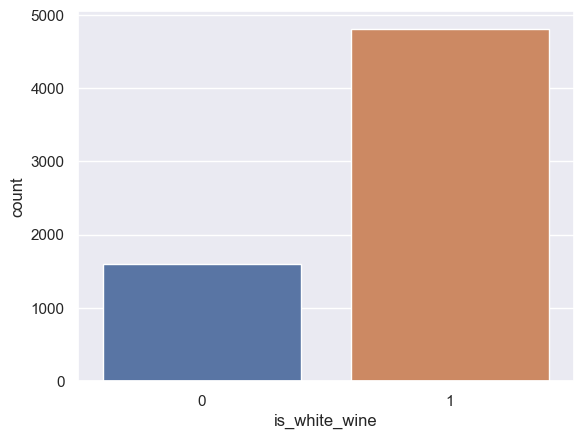

In [69]:
sns.countplot(x="is_white_wine",data=df)
plt.show()

In [155]:
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "is_white_wine"]
label = "quality"

In [156]:
x = df[features].values
y = df[label]

In [157]:
x = StandardScaler().fit_transform(x)

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [159]:
lr = LinearRegression()

In [160]:
lr.fit(x_train, y_train)

LinearRegression()

In [161]:
y_pred = lr.predict(x_test)

In [162]:
y_pred

array([5.1522894 , 5.99600951, 6.59792149, ..., 6.43310958, 5.53822826,
       5.73962549])

In [163]:
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

MAE 0.5728011490368385
MSE 0.5400924103202562


In [164]:
pred_score = np.round_(y_pred)
pred_score

array([5., 6., 7., ..., 6., 6., 6.])

In [165]:
accuracy_score(y_test, pred_score)

0.5287141073657927

In [166]:
perm = PermutationImportance(lr).fit(x_test, y_test)
eli5.show_weights(perm, feature_names=features)

Weight,Feature
0.2887 ± 0.0267,density
0.2161 ± 0.0124,residual sugar
0.1536 ± 0.0263,alcohol
0.1361 ± 0.0174,volatile acidity
0.0852 ± 0.0151,is_white_wine
0.0469 ± 0.0176,fixed acidity
0.0309 ± 0.0084,free sulfur dioxide
0.0302 ± 0.0051,pH
0.0295 ± 0.0050,sulphates
0.0167 ± 0.0077,total sulfur dioxide


In [170]:
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "is_white_wine", "quality"]
label = "alcohol"

In [185]:
import random

class LinearRegressionBetter:
    def __init__(self) -> None:
        self._weights: np.ndarray = None
        self._bias: float = None

    def fit(self, x: np.ndarray, y: np.ndarray, lr: float = 1e-3, epochs: int = 100) -> None:
        self._weights = np.zeros(x.shape[1])
        self._bias = random.uniform(-1, 1)

        for i in range(0, epochs):
            y_f = x.dot(self._weights) + self._bias

            d_w = -2 / x.size * np.dot(x.T, (y - y_f))
            d_b = -2 /  x.size * np.sum(y - y_f)

            self._weights -= lr * d_w
            self._bias -= lr * d_b

    def predict(self, x: np.ndarray) -> np.ndarray:
        return np.dot(x, self._weights) + self._bias

In [171]:
x = df[features].values
y = df[label]


In [172]:
x = StandardScaler().fit_transform(x)

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [187]:
lr = LinearRegression()
lrb = LinearRegressionBetter()
lr.fit(x_train, y_train)
lrb.fit(x_train, y_train, epochs=10000)

In [175]:
y_pred = lr.predict(x_test)

In [176]:
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

MAE 0.32984263063422636
MSE 0.19987293836239878


In [177]:
a = pd.DataFrame({"a": [1, 2, 3, 4, 5, 6], "b": [43, 423, 654, 6, 54, 6], "label": [1, 0, 1, 1, 0, 1]})
a.head()

,a,b,label
0,1,43,1
1,2,423,0
2,3,654,1
3,4,6,1
4,5,54,0


In [179]:
def permutation_importance(x: np.ndarray, y: np.ndarray, model: LinearRegression, features: List[str]) -> pd.DataFrame:
    base_mse = mean_squared_error(y, model.predict(x))

    diff: List[float] = []

    dataset = pd.DataFrame(x, columns=features)
    for feature in features:
        df = dataset.copy()
        np.random.shuffle(df[feature].values)
        new_mse = mean_squared_error(y, model.predict(df[features].values))
        diff.append(1 - (new_mse / base_mse))
    
    return pd.DataFrame({"feature": features, "diff": diff}).sort_values(by=["diff"])
    

In [180]:
permutation_importance(x_test, y_test, lr, features)

,feature,diff
7,density,-42.332144
3,residual sugar,-12.068583
0,fixed acidity,-4.683972
10,is_white_wine,-3.332525
8,pH,-1.837246
9,sulphates,-0.276453
1,volatile acidity,-0.110753
11,quality,-0.060711
5,free sulfur dioxide,-0.031836
2,citric acid,-0.029058


In [181]:
perm = PermutationImportance(lr).fit(x_test, y_test)
eli5.show_weights(perm, feature_names=features)

Weight,Feature
5.8664 ± 0.1359,density
1.6722 ± 0.0455,residual sugar
0.6789 ± 0.0390,fixed acidity
0.4352 ± 0.0299,is_white_wine
0.2727 ± 0.0108,pH
0.0320 ± 0.0038,sulphates
0.0159 ± 0.0023,volatile acidity
0.0064 ± 0.0018,free sulfur dioxide
0.0062 ± 0.0017,quality
0.0042 ± 0.0015,citric acid


In [183]:
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'is_white_wine',
 'quality']

In [182]:
lr.coef_

array([ 0.72691115,  0.10538234,  0.06613666,  1.06308579, -0.01568641,
       -0.06240813,  0.04393278, -2.01798249,  0.42633289,  0.14501406,
       -0.55292502,  0.07058583])